# 3장 처음 시작하는 머신러닝

가장 가까운 1차 함수를 구하는 것 : 선형회귀

입력값으로 출력값을 예측하는 함수 : 예측 함수

파라미터 수정 과정을 발전시킨 것(에측 계산,손실 게산, 경사 계산, 파라미터 수정 과정을 발전) : 최적화 함수

모델로 예측한 ㄱ밧과 정답사이의 오차를 수차화 한것 : 손실

-> 최대값 구하기 => 최솟값 구하기



pred : 예측 함수
파라미터 수정 : learning rate(lr)을 곱해서 W,B를 줄여 나가는 것


## 3.0 초기 설정

In [1]:
#처음할때만 실행해주고 다음부턴 안해줌
"""
!sudo apt-get install -y fonts-nanum* | tail -n 1
!sudo fc-cache -fv
!rm -rf ~/.cache/matplotlib
"""

'\n!sudo apt-get install -y fonts-nanum* | tail -n 1\n!sudo fc-cache -fv\n!rm -rf ~/.cache/matplotlib\n'

In [2]:
!pip install graphviz

In [3]:
# 라이브러리 임포트,폰트 사용안함 문제없음

%matplotlib inline


import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import numpy as np

# 파이토치 관련 라이브러리
import torch

c:\Users\white\AppData\Local\Programs\Python\Python37\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 3.5 데이터 전처리

In [4]:
sampleData1 = np.array([ # 신장,체중
    [166,58.7],
    [176.0,75.7],
    [171.0,62.1],
    [173.0,70.4],
    [169.0,60.1]
    
])
print(sampleData1)

[[166.   58.7]
 [176.   75.7]
 [171.   62.1]
 [173.   70.4]
 [169.   60.1]]


In [5]:
#신장 : x, 체중 : y
x=sampleData1[:,0]
y=sampleData1[:,1]

C:\Users\white\AppData\Roaming\Python\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49888 (\N{HANGUL SYLLABLE SIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\white\AppData\Roaming\Python\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\white\AppData\Roaming\Python\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\white\AppData\Roaming\Python\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\white\AppData\Roaming\Python\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) mis

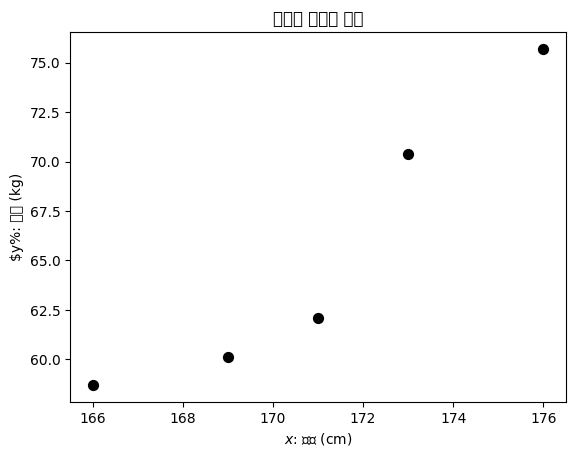

In [6]:
#산포도
plt.scatter(x,y,c='k',s=50)
plt.xlabel('$x$: 신장 (cm)')
plt.ylabel('$y%: 체중 (kg)')
plt.title('신장과 체중의 관계')
plt.show()

In [7]:
# 데이터 변환
X=x-x.mean()
Y=y-y.mean()

In [8]:
print(X)
print(Y)

[-5.  5.  0.  2. -2.]
[-6.7 10.3 -3.3  5.  -5.3]


C:\Users\white\AppData\Roaming\Python\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\white\AppData\Roaming\Python\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\white\AppData\Roaming\Python\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\white\AppData\Roaming\Python\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\white\AppData\Roaming\Python\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44277 (\N{HANGUL SYLLABLE GONG}) missing

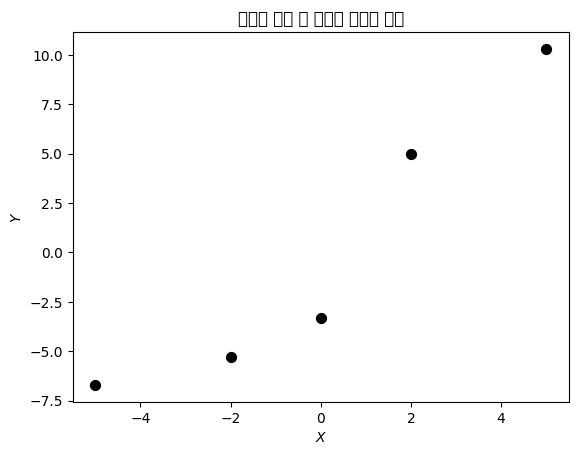

In [9]:
# 산포도를 통해 결과 확인

plt.scatter(X,  Y,  c='k',  s=50)
plt.xlabel('$X$')
plt.ylabel('$Y$')
plt.title('데이터 가공 후 신장과 체중의 관계')
plt.show()

## 3.6 예측 계산

In [10]:
# X와 Y를 텐서 변수로 변환

X = torch.tensor(X).float()
Y = torch.tensor(Y).float()

In [12]:
print(X)
print(Y)

tensor([-5.,  5.,  0.,  2., -2.])
tensor([-6.7000, 10.3000, -3.3000,  5.0000, -5.3000])


In [11]:
# 파라미터 정의
# W와 B는 경사 계산을 위해, requires_grad=True 로 설정함

W = torch.tensor(1.0, requires_grad=True).float()
B = torch.tensor(1.0, requires_grad=True).float()

In [13]:
# 예측 함수는 1차 함수

def pred(X):
    return W * X + B

In [14]:
# 예측 값 계산

Yp =  pred(X)

In [15]:
# 결과 확인

print(Yp)

tensor([-4.,  6.,  1.,  3., -1.], grad_fn=<AddBackward0>)


In [16]:
params={'W':W,'B':B}

## 3.7 손실 계산

In [17]:
#평균 제곱 오차 손실 함수

def mse(Yp,Y):
    loss=((Yp-Y)**2).mean()
    return loss


In [18]:
loss=mse(Yp,Y)

In [19]:
print(loss)

tensor(13.3520, grad_fn=<MeanBackward0>)


## 3.8 경사 계산

In [20]:
#경사 계산
loss.backward()

In [21]:
print(W)

tensor(1., requires_grad=True)


In [22]:
print(W.grad)
print(B.grad)

tensor(-19.0400)
tensor(2.0000)


## 3.9 파라미터 수정

In [25]:
lr = 0.001

#경사를 기반으로 파라미터 수정
with torch.no_grad():
    W -= lr*W.grad
    B -= lr*B.grad

    #계산이 끝난 경사값을 초기화 함

    W.grad.zero_()
    B.grad.zero_()

In [26]:
#W에 값과 경사값 이 있는데 값은 최적의 파라미터를 나타내고, 경사값은 그 값의 오차율에 따른 경사값을 가지고 있다
#경사값을 진행할 수록 더해지기 때문에 매번 초기화해야함

print(W)
print(B)
print(W.grad)
print(B.grad)

tensor(1.0381, requires_grad=True)
tensor(0.9960, requires_grad=True)
tensor(0.)
tensor(0.)


## 3.10 반복 계산

In [27]:
# 초기화

# W와 B를 변수로 사용
W = torch.tensor(1.0, requires_grad=True).float()
B = torch.tensor(1.0, requires_grad=True).float()

# 반복 횟수
num_epochs = 500

# 학습률
lr = 0.001

# history 기록을 위한 배열 초기화
history = np.zeros((0, 2))

In [28]:
# 루프 처리

for epoch in range(num_epochs):

    # 예측 계산
    Yp = pred(X)
    
    # 손실 계산
    loss = mse(Yp, Y)
    
    # 경사 계산
    loss.backward()
    
    with torch.no_grad():
        # 파라미터 수정
        W -= lr * W.grad
        B -= lr * B.grad
        
        # 경삿값 초기화
        W.grad.zero_()
        B.grad.zero_()
        
    # 손실 기록
    if (epoch %10 == 0):
        item = np.array([epoch, loss.item()])
        history = np.vstack((history, item))
        print(f'epoch = {epoch}  loss = {loss:.4f}')

epoch = 0  loss = 13.3520
epoch = 10  loss = 10.3855
epoch = 20  loss = 8.5173
epoch = 30  loss = 7.3364
epoch = 40  loss = 6.5858
epoch = 50  loss = 6.1047
epoch = 60  loss = 5.7927
epoch = 70  loss = 5.5868
epoch = 80  loss = 5.4476
epoch = 90  loss = 5.3507
epoch = 100  loss = 5.2805
epoch = 110  loss = 5.2275
epoch = 120  loss = 5.1855
epoch = 130  loss = 5.1507
epoch = 140  loss = 5.1208
epoch = 150  loss = 5.0943
epoch = 160  loss = 5.0703
epoch = 170  loss = 5.0480
epoch = 180  loss = 5.0271
epoch = 190  loss = 5.0074
epoch = 200  loss = 4.9887
epoch = 210  loss = 4.9708
epoch = 220  loss = 4.9537
epoch = 230  loss = 4.9373
epoch = 240  loss = 4.9217
epoch = 250  loss = 4.9066
epoch = 260  loss = 4.8922
epoch = 270  loss = 4.8783
epoch = 280  loss = 4.8650
epoch = 290  loss = 4.8522
epoch = 300  loss = 4.8399
epoch = 310  loss = 4.8281
epoch = 320  loss = 4.8167
epoch = 330  loss = 4.8058
epoch = 340  loss = 4.7953
epoch = 350  loss = 4.7853
epoch = 360  loss = 4.7756
epoch = 37

In [29]:
# 최종 파라미터 값
print('W = ', W.data.numpy())
print('B = ', B.data.numpy())

# 손실 확인
print(f'초기상태 : 손실:{history[0,1]:.4f}') 
print(f'최종상태 : 손실:{history[-1,1]:.4f}') 

W =  1.820683
B =  0.3675114
초기상태 : 손실:13.3520
최종상태 : 손실:4.6796


C:\Users\white\AppData\Roaming\Python\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\white\AppData\Roaming\Python\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49845 (\N{HANGUL SYLLABLE SEUB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\white\AppData\Roaming\Python\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44257 (\N{HANGUL SYLLABLE GOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\white\AppData\Roaming\Python\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49440 (\N{HANGUL SYLLABLE SEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\white\AppData\Roaming\Python\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49552 (\N{HANGUL SYLLABLE SON}) mi

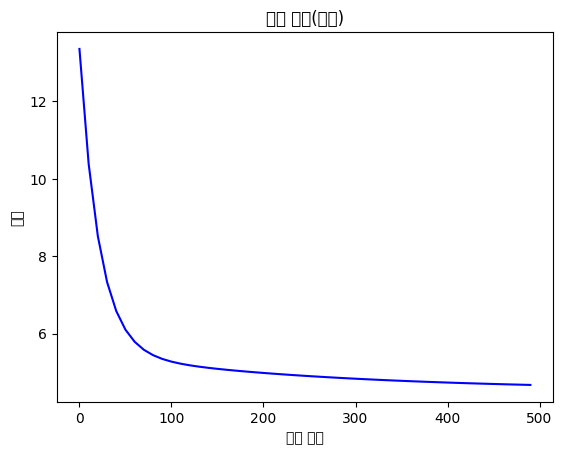

In [30]:
# 학습 곡선 출력(손실)

plt.plot(history[:,0], history[:,1], 'b')
plt.xlabel('반복 횟수')
plt.ylabel('손실')
plt.title('학습 곡선(손실)')
plt.show()

In [31]:
# x의 범위를 구함(Xrange)
X_max = X.max()
X_min = X.min()
X_range = np.array((X_min, X_max))
X_range = torch.from_numpy(X_range).float()
print(X_range)

# 이와 대응하는 예측값 y를 구함
Y_range = pred(X_range)
print(Y_range.data)

tensor([-5.,  5.])
tensor([-8.7359,  9.4709])


C:\Users\white\AppData\Roaming\Python\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49888 (\N{HANGUL SYLLABLE SIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\white\AppData\Roaming\Python\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\white\AppData\Roaming\Python\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\white\AppData\Roaming\Python\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\white\AppData\Roaming\Python\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) mis

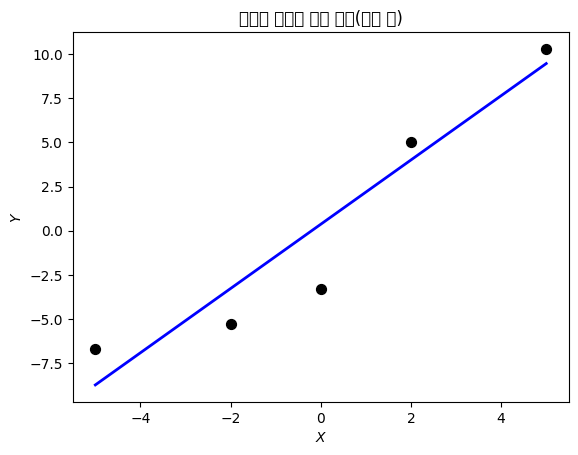

In [32]:
# 그래프 출력

plt.scatter(X,  Y,  c='k',  s=50)
plt.xlabel('$X$')
plt.ylabel('$Y$')
plt.plot(X_range.data, Y_range.data, lw=2, c='b')
plt.title('신장과 체중의 상관 직선(가공 후)')
plt.show()

In [33]:
# y좌표와 x좌표 값 계산

x_range = X_range + x.mean()
yp_range = Y_range + y.mean()